# EE5357 Introduction to Image Processing 

# Homework 3

In [44]:
%matplotlib inline

In [45]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

144 176


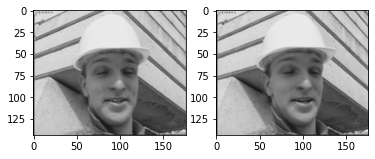

In [46]:
I1 = mpimg.imread('first_frame.png')
I2 = mpimg.imread('second_frame.png')

#scaling
I1 *= 255 
I2 *= 255

f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(I1,cmap=plt.get_cmap('gray'))
f.add_subplot(1,2,2)
plt.imshow(I2,cmap=plt.get_cmap('gray'))
M,N = np.shape(I1)
print(M,N)

## Algorithm

In [47]:
def frame(img,i,j):
    return img[i:i+16,j:j+16]


# This funtion returns motion vectors for a particular 16x16 
def motion_vect(img1,img2,i,j,pixeldist):
    M,N = np.shape(img1)
    temp_arr = [-pixeldist,0,pixeldist]
    d1,d2 = 0,0
    opt_diff = np.sum(np.abs(frame(img1,i,j)-frame(img2,i,j)))
    for l1 in temp_arr:
        for l2 in temp_arr:
            if((i+l1>=0 and i+l1<M-16) and (j+l2>=0 and j+l2<N-16)):
                opt_diff_temp = np.sum(np.abs(frame(img1,i,j)-frame(img2,i+l1,j+l2)))
                if(opt_diff_temp<opt_diff):
                    opt_diff = opt_diff_temp
                    d1,d2 = l1,l2
            else:
                continue
                
    return d1,d2
    

### Step 1:

In [48]:
mat1 = np.zeros((2,9,11)) # for storing d1 & d2
for i in range(0,M,16):
    for j in range(0,N,16):
        d1,d2 = motion_vect(I1,I2,i,j,pixeldist=4)
        mat1[:2,int(i/16),int(j/16)] = [d1,d2]
        
#print(mat1)
# upper 9x11 matrix stores d1 values and bottom one stores d2...

### Step 2:

In [49]:
mat2 = np.zeros((2,9,11)) # for storing d1 & d2
for i in range(0,M,16):
    for j in range(0,N,16):
        d1,d2 = motion_vect(I1,I2,i+int(mat1[0,int(i/16),int(j/16)]),j+int(mat1[1,int(i/16),int(j/16)]),pixeldist=2)
        mat2[:2,int(i/16),int(j/16)] = [d1,d2]
        
#print(mat2)

# Calculating net shift after two steps
mat_net = mat1+mat2
#print(mat_net)

### Step 3:

In [50]:
mat3 = np.zeros((2,9,11)) # for storing d1 & d2
for i in range(0,M,16):
    for j in range(0,N,16):
        d1,d2 = motion_vect(I1,I2,i+int(mat_net[0,int(i/16),int(j/16)]),j+int(mat_net[1,int(i/16),int(j/16)]),pixeldist=1)
        mat3[:2,int(i/16),int(j/16)] = [d1,d2]
        
#print(mat3)

#final matrix after 3 steps
mat_final = mat_net + mat3
#print(mat_final)

### We printed motion vectors in forward direction (Image1 to Image2), now we will quickly print motion vectors in backward direction (Image2 to Image1) as well..

In [51]:
mat1_rev = np.zeros((2,9,11)) 
for i in range(0,M,16):
    for j in range(0,N,16):
        d1,d2 = motion_vect(I2,I1,i,j,pixeldist=4)
        mat1_rev[:2,int(i/16),int(j/16)] = [d1,d2]
    
mat2_rev = np.zeros((2,9,11)) 
for i in range(0,M,16):
    for j in range(0,N,16):
        d1,d2 = motion_vect(I2,I1,i+int(mat1_rev[0,int(i/16),int(j/16)]),j+int(mat1_rev[1,int(i/16),int(j/16)]),pixeldist=2)
        mat2_rev[:2,int(i/16),int(j/16)] = [d1,d2]
        

# Calculating net shift after two steps
mat_net_rev = mat1_rev + mat2_rev

mat3_rev = np.zeros((2,9,11)) 
for i in range(0,M,16):
    for j in range(0,N,16):
        d1,d2 = motion_vect(I2,I1,i+int(mat_net_rev[0,int(i/16),int(j/16)]),j+int(mat_net_rev[1,int(i/16),int(j/16)]),pixeldist=1)
        mat3_rev[:2,int(i/16),int(j/16)] = [d1,d2]
        

#final matrix after 3 steps
mat_final_rev = mat_net_rev + mat3_rev
        

## Plotting Motion Vectors

In [58]:
# conversion of mat_final to a list of vectors, each vector:[d1,d2]
motion_vectors_forward = []
dim,J,K = np.shape(mat_net)
for i in range(J):
    for j in range(K):
        motion_vectors_forward.append([int(mat_final[0,i,j]),int(mat_final[1,i,j])])
        
#print(motion_vectors_forward)

motion_vectors_reverse = []
for i in range(J):
    for j in range(K):
        motion_vectors_reverse.append([int(mat_final_rev[0,i,j]),int(mat_final_rev[1,i,j])])

In [59]:
def motion_vector_plot(img1,img2,motion_vectors):
    J,K = np.divide(np.shape(img1),16)
    plt.figure(figsize=(8,8))
    for i in range(int(J)):
        center_x = i*16+8
        for j in range(int(K)):
            center_y = j*16+8
            plt.scatter(center_y,center_x,c = 'black',s=10)
            plt.arrow(center_y,center_x,motion_vectors[int(K)*i+j][1],motion_vectors[int(K)*i+j][0],head_width=1.5,fc='black')
    plt.gca().invert_yaxis()
    plt.imshow(img1,cmap = 'gray')
    plt.show()
    return

<Figure size 432x288 with 0 Axes>

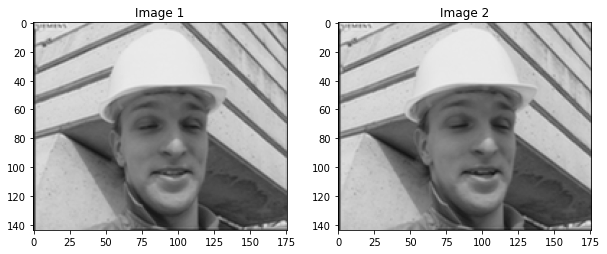

Motion vectors from I1 to I2:-


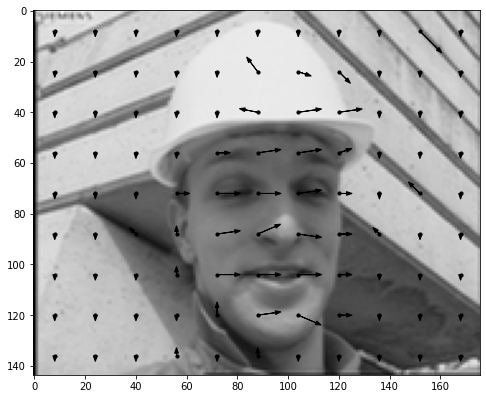

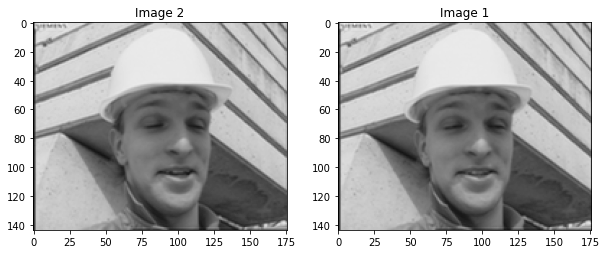

Motion vectors from I2 to I1:-


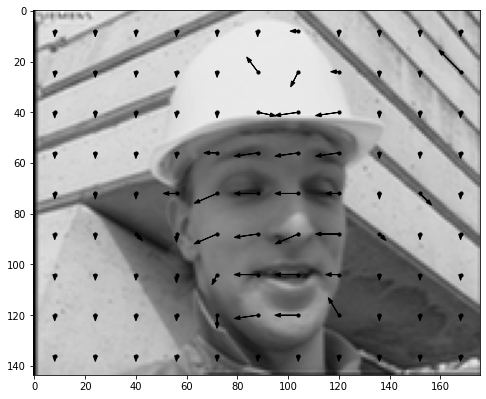

In [60]:
plt.figure()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))
ax1.imshow(I1,cmap='gray')
ax2.imshow(I2,cmap='gray')
ax1.set_title("Image 1")
ax2.set_title("Image 2")
plt.show()

print("Motion vectors from I1 to I2:-")
motion_vector_plot(I1,I2,motion_vectors_forward)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))
ax1.imshow(I2,cmap='gray')
ax2.imshow(I1,cmap='gray')
ax1.set_title("Image 2")
ax2.set_title("Image 1")
plt.show()

print("Motion vectors from I2 to I1:-")
motion_vector_plot(I2,I1,motion_vectors_reverse)

## Motion Compensated Predicted Frame

In [61]:
#Image 2 prediction using Image 1 and reverse motion vectors(mat_final_rev)
I2_pred = np.zeros((M,N))
for i in range(0,M,16):
    for j in range(0,N,16):
        d1,d2 = int(mat_final_rev[0,int(i/16),int(j/16)]/2),int(mat_final_rev[1,int(i/16),int(j/16)]/2)
        I2_pred[i:i+16,j:j+16] = I1[i+d1:i+d1+16,j+d2:j+d2+16]

        
#Image 1 prediction using Image 2 and rforward motion vectors(mat_final)
I1_pred = np.zeros((M,N))
for i in range(0,M,16):
    for j in range(0,N,16):
        d1,d2 = int(mat_final[0,int(i/16),int(j/16)]/2),int(mat_final[1,int(i/16),int(j/16)]/2)
        I1_pred[i:i+16,j:j+16] = I2[i+d1:i+d1+16,j+d2:j+d2+16]

<Figure size 432x288 with 0 Axes>

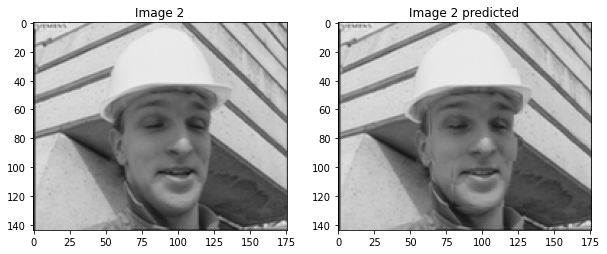

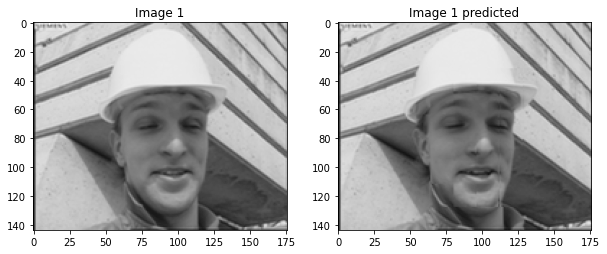

In [62]:
plt.figure()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))
ax1.imshow(I2,cmap='gray')
ax2.imshow(I2_pred,cmap='gray')
ax1.set_title("Image 2")
ax2.set_title("Image 2 predicted")
plt.show()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))
ax1.imshow(I1,cmap='gray')
ax2.imshow(I1_pred,cmap='gray')
ax1.set_title("Image 1")
ax2.set_title("Image 1 predicted")
plt.show()

## Error Prediction

In [57]:
#Average error in pixel intensity
def mean_error(img1,img2):
    M,N = np.shape(img1)
    return np.divide(np.sum(abs(img1-img2)),M*N)

print("Mean Error b/w I2 & I2_pred = "+str(mean_error(I2,I2_pred)))
print("Mean Error b/w I2 & I2_pred = "+str(mean_error(I1,I1_pred)))

Mean Error b/w I2 & I2_pred = 3.622316919191919
Mean Error b/w I2 & I2_pred = 3.6002604166666665
